In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [2]:
#import libraries
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read in CSV
df = pd.read_csv('../input/sales-forecasting/train.csv')

In [4]:
#peak at data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
#check out column and datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
#convert order date to datetime
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')

In [7]:
#convert ship date to datetime
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [8]:
#drop row id
df.drop('Row ID', axis=1, inplace=True)

In [9]:
#rename columns, getting rid of spaces
df.rename(columns={'Order ID':'Order_ID', 'Order Date':'Order_Date', 'Ship Date':'Ship_Date', 'Ship Mode':'Ship_Mode', 'Customer ID':'Customer_ID', 'Customer Name':'Customer_Name', 'Postal Code':'Postal_Code', 'Product ID':'Product_ID', 'Sub-Category':'Sub_Category', 'Product Name':'Product_Name'}, inplace=True)

In [10]:
#check for null values
df.isnull().sum()

Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [11]:
#There are 11 Postal_Code values missing. Let's take a look
dfnull = df[df.isna().any(axis=1)]

In [12]:
dfnull
#all missing postal codes are from Burlington, Vermont. This city has 5 postal codes and we arent sure which one to use so we will skip for now.

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


# **Analysis**

# **SALES**

## **Sales Percentages by Category**

In [13]:
#calculate percentage of sales from each categgory
df.Category.value_counts(normalize=True)

Office Supplies    0.602959
Furniture          0.212041
Technology         0.185000
Name: Category, dtype: float64

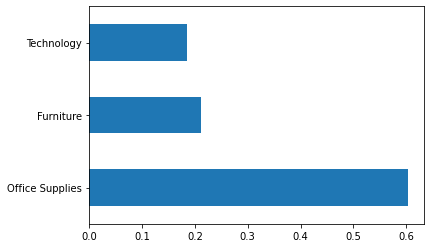

In [14]:
#plot this as a bar graph
df.Category.value_counts(normalize=True).plot.barh()
plt.show()

In [15]:
#run univariate categorical analysis
category_count = df.Category.value_counts()
category_count.describe()

count       3.000000
mean     3266.666667
std      2292.160626
min      1813.000000
25%      1945.500000
50%      2078.000000
75%      3993.500000
max      5909.000000
Name: Category, dtype: float64

## **Sales Percentages by Sub_Category**

In [16]:
#calculate percentage of sales from each categgory
df.Sub_Category.value_counts(normalize=True)

Binders        0.152245
Paper          0.136531
Furnishings    0.095000
Phones         0.089388
Storage        0.084898
Art            0.080102
Accessories    0.077143
Chairs         0.061939
Appliances     0.046837
Labels         0.036429
Tables         0.032041
Envelopes      0.025306
Bookcases      0.023061
Fasteners      0.021837
Supplies       0.018776
Machines       0.011735
Copiers        0.006735
Name: Sub_Category, dtype: float64

<AxesSubplot:ylabel='Sub_Category'>

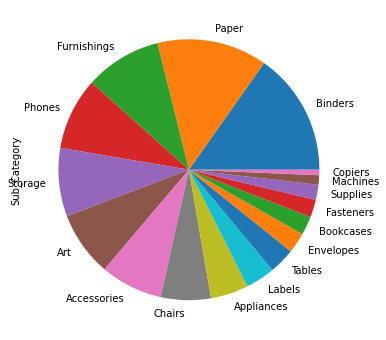

In [17]:
#plot this as a pie chart
subcatpieplot = df.Sub_Category.value_counts().plot.pie(figsize=(6,6))
subcatpieplot

In [18]:
#run univariate categorical analysis
subcategory_count = df.Sub_Category.value_counts()
subcategory_count.describe()

count      17.000000
mean      576.470588
std       425.441406
min        66.000000
25%       226.000000
50%       459.000000
75%       832.000000
max      1492.000000
Name: Sub_Category, dtype: float64

## **Top 5 Sub-Categories in each Category by Sales**

In [19]:
df_subcat = df.groupby(['Category', 'Sub_Category']).agg({'Sales' : sum})
df_subcat.sort_values(by='Sales', ascending=False).groupby('Category').head(5).sort_index()

Sales
Category        Sub_Category             
Furniture       Bookcases     113813.1987
                Chairs        322822.7310
                Furnishings    89212.0180
                Tables        202810.6280
Office Supplies Appliances    104618.4030
                Binders       200028.7850
                Paper          76828.3040
                Storage       219343.3920
                Supplies       46420.3080
Technology      Accessories   164186.7000
                Copiers       146248.0940
                Machines      189238.6310
                Phones        327782.4480

## **Sales by City**

In [20]:
#top 10 cities by sale
df.groupby('City').agg({'Sales' : sum}).sort_values(by = 'Sales', ascending=False).head(10)

,Sales
City,
New York City,252462.5470
Los Angeles,173420.1810
Seattle,116106.3220
San Francisco,109041.1200
Philadelphia,108841.7490
Houston,63956.1428
Chicago,47820.1330
San Diego,47521.0290
Jacksonville,44713.1830


In [21]:
#bottom cities by sale
df.groupby('City').agg({'Sales' : sum}).sort_values(by = 'Sales', ascending=True).head(10)

,Sales
City,
Abilene,1.392
Elyria,1.824
Jupiter,2.064
Pensacola,2.214
Ormond Beach,2.808
San Luis Obispo,3.620
Springdale,4.300
Layton,4.960
Keller,6.000


## **Top 10 States by Sales Total**

In [22]:
#top 10 states by sale
df.groupby('State').agg({'Sales' : sum}).sort_values(by = 'Sales', ascending=False).head(10)

,Sales
State,
California,446306.4635
New York,306361.1470
Texas,168572.5322
Washington,135206.8500
Pennsylvania,116276.6500
Florida,88436.5320
Illinois,79236.5170
Michigan,76136.0740
Ohio,75130.3500


## **Total Sales by Region**

In [23]:
df.groupby('Region').agg({'Sales' : sum}).sort_values(by = 'Sales', ascending=False)

,Sales
Region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590


## **Best Months for Sales**

In [24]:
#extract month/year from order date
df['Month'] = df['Order_Date'].dt.month_name()
df['Year'] = df['Order_Date'].dt.year


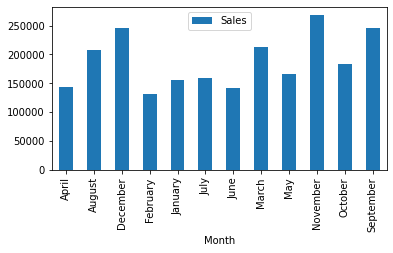

In [25]:
#Monthly Sales aggregate
sale_month = df.groupby('Month').agg({'Sales' : sum}).sort_values(by='Month').plot.bar(figsize=(6,3))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9800 non-null   object        
 1   Order_Date     9800 non-null   datetime64[ns]
 2   Ship_Date      9800 non-null   datetime64[ns]
 3   Ship_Mode      9800 non-null   object        
 4   Customer_ID    9800 non-null   object        
 5   Customer_Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal_Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product_ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub_Category   9800 non-null   object        
 15  Product_Name   9800 n